# CamCAN MEG Dataset Exploration

This notebook explores the **Cambridge Centre for Ageing and Neuroscience (CamCAN)** MEG dataset.

## Dataset Information
- **Study**: CamCAN Phase 2 (cc700 cohort)
- **Data Type**: Resting state MEG data
- **BIDS Version**: 1.4.0
- **Scanner**: VectorView MEG system

### Citation
Shafto, M.A., Tyler, L.K., Dixon, M., Taylor, J.R., Rowe, J.B., Cusack, R., Calder, A.J., Marslen-Wilson, W.D., Duncan, J., Dalgleish, T., Henson, R.N., Brayne, C., CamCAN, & Matthews, F.E. (2014). The Cambridge Centre for Ageing and Neuroscience (CamCAN) study protocol: a cross-sectional, lifespan, multidisciplinary examination of healthy cognitive ageing. BMC Neurology, 14(204).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Define dataset paths
base_path = Path('/Users/yihein.chai/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Research/meg/CamCAN/cc700')
rest_path = base_path / 'rest'
noise_path = base_path / 'noise'

print("Dataset paths configured successfully!")

Dataset paths configured successfully!


## 1. Load and Explore Dataset Metadata

In [2]:
# Load dataset description
with open(rest_path / 'dataset_description.json', 'r') as f:
    dataset_info = json.load(f)

print("="*60)
print("DATASET DESCRIPTION")
print("="*60)
for key, value in dataset_info.items():
    if isinstance(value, list):
        print(f"\n{key}:")
        for item in value:
            print(f"  - {item}")
    else:
        print(f"\n{key}: {value}")
print("="*60)

DATASET DESCRIPTION

Name: Resting state MEG data from CamCAN's cc700 (Stage 2) cohort

BIDSVersion: 1.4.0

DatasetType: raw

Authors:
  - Knights, E
  - Henson, R

Acknowledgements: Data collection and sharing for this project was provided by the Cambridge Centre for Ageing and Neuroscience (CamCAN). CamCAN funding was provided by the UK Biotechnology and Biological Sciences Research Council (grant number BB/H008217/1), together with support from the UK Medical Research Council and University of Cambridge, UK.

HowToAcknowledge: Cite this paper: Shafto, M.A., Tyler, L.K., Dixon, M., Taylor, J.R., Rowe, J.B., Cusack, R., Calder, A.J., Marslen-Wilson, W.D., Duncan, J., Dalgleish, T., Henson, R.N., Brayne, C., CamCAN, & Matthews, F.E. (2014). The Cambridge Centre for Ageing and Neuroscience (CamCAN) study protocol: a cross-sectional, lifespan, multidisciplinary examination of healthy cognitive ageing. BMC Neurology, 14(204). doi:10.1186/s12883-014-0204-1

Funding:
  - UK Biotechnology an

## 2. Load Participant Information

In [3]:
# Load participants data
participants = pd.read_csv(rest_path / 'participants.tsv', sep='\t')

print(f"Total number of participants: {len(participants)}")
print(f"\nDataset columns: {list(participants.columns)}")
print(f"\nFirst few rows:")
participants.head()

Total number of participants: 646

Dataset columns: ['participant_id', 'p2_age', 'sex', 'handedness', 'arm', 'years_edu', 'p2_scanner', 'p2_MEG_Rest', 'p2_MEG_SMT', 'p2_MEG_SMT_passive', 'p2_MEG_general_notes']

First few rows:


,participant_id,p2_age,sex,handedness,arm,years_edu,p2_scanner,p2_MEG_Rest,p2_MEG_SMT,p2_MEG_SMT_passive,p2_MEG_general_notes
0,sub-CC110033,24.7,M,90.0,1,16,VectorView,NaN,NaN,NaN,NaN
1,sub-CC110037,18.9,M,89.0,1,13,VectorView,may have fallen asleep - moved head at around ...,task.avg saved to CBU. Task.raw saved to camcan,NaN,NaN
2,sub-CC110045,24.6,F,100.0,1,18,VectorView,lights not dimmed to 60 until after rest but h...,NaN,NaN,NaN
3,sub-CC110056,22.8,F,100.0,1,16,VectorView,may well have fallen asleep - mouth was open,NaN,particpant was looking all round the room at s...,NaN
4,sub-CC110069,28.9,F,-58.0,1,16,VectorView,NaN,NaN,NaN,Left eye had drooping lid. Lot of door banging...


In [4]:
# Summary statistics
print("="*60)
print("PARTICIPANT DEMOGRAPHICS")
print("="*60)
print(f"\nAge statistics:")
print(participants['p2_age'].describe())
print(f"\nSex distribution:")
print(participants['sex'].value_counts())
print(f"\nEducation (years) statistics:")
print(participants['years_edu'].describe())
print(f"\nHandedness statistics:")
print(participants['handedness'].describe())

PARTICIPANT DEMOGRAPHICS

Age statistics:
count    646.000000
mean      55.332198
std       18.519335
min       18.700000
25%       40.225000
50%       55.550000
75%       70.900000
max      112.800000
Name: p2_age, dtype: float64

Sex distribution:
sex
M    327
F    319
Name: count, dtype: int64

Education (years) statistics:
count    646.000000
mean      14.752322
std        2.908520
min        0.000000
25%       13.000000
50%       16.000000
75%       16.000000
max       18.000000
Name: years_edu, dtype: float64

Handedness statistics:
count    644.000000
mean      78.656832
std       49.511944
min     -100.000000
25%       88.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: handedness, dtype: float64


## 3. Visualize Demographics

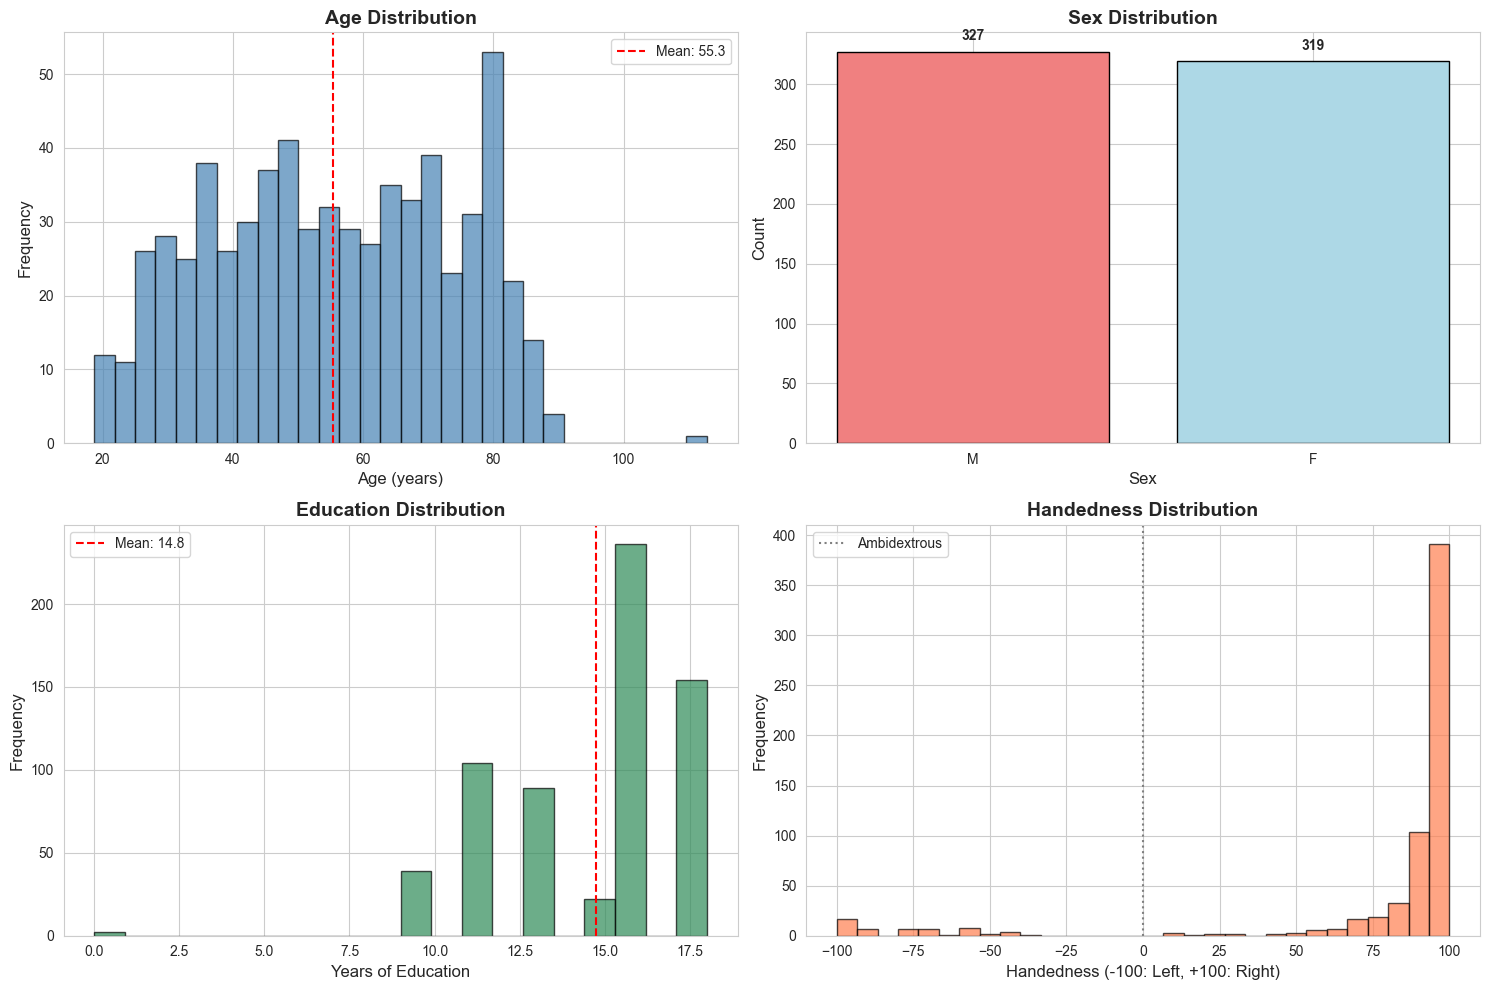

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
axes[0, 0].hist(participants['p2_age'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Age (years)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].axvline(participants['p2_age'].mean(), color='red', linestyle='--', 
                    label=f"Mean: {participants['p2_age'].mean():.1f}")
axes[0, 0].legend()

# Sex distribution
sex_counts = participants['sex'].value_counts()
axes[0, 1].bar(sex_counts.index, sex_counts.values, color=['lightcoral', 'lightblue'], edgecolor='black')
axes[0, 1].set_xlabel('Sex', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_title('Sex Distribution', fontsize=14, fontweight='bold')
for i, v in enumerate(sex_counts.values):
    axes[0, 1].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Education distribution
axes[1, 0].hist(participants['years_edu'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='seagreen')
axes[1, 0].set_xlabel('Years of Education', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Education Distribution', fontsize=14, fontweight='bold')
axes[1, 0].axvline(participants['years_edu'].mean(), color='red', linestyle='--', 
                    label=f"Mean: {participants['years_edu'].mean():.1f}")
axes[1, 0].legend()

# Handedness distribution
axes[1, 1].hist(participants['handedness'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1, 1].set_xlabel('Handedness (-100: Left, +100: Right)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Handedness Distribution', fontsize=14, fontweight='bold')
axes[1, 1].axvline(0, color='gray', linestyle=':', label='Ambidextrous')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 4. Explore Dataset Structure

In [6]:
# Check available subjects
rest_subjects = sorted([d.name for d in rest_path.iterdir() if d.is_dir() and d.name.startswith('sub-')])
noise_subjects = sorted([d.name for d in noise_path.iterdir() if d.is_dir() and d.name.startswith('sub-')])

print("="*60)
print("DATASET STRUCTURE")
print("="*60)
print(f"\nResting state data - Number of subjects: {len(rest_subjects)}")
print(f"Noise data - Number of subjects: {len(noise_subjects)}")
print(f"\nFirst 5 subjects in rest dataset: {rest_subjects[:5]}")
print(f"First 5 subjects in noise dataset: {noise_subjects[:5]}")

DATASET STRUCTURE

Resting state data - Number of subjects: 3
Noise data - Number of subjects: 3

First 5 subjects in rest dataset: ['sub-CC110033', 'sub-CC110037', 'sub-CC110045']
First 5 subjects in noise dataset: ['sub-CC110033', 'sub-CC110037', 'sub-CC110045']


In [7]:
# Explore a sample subject directory
if rest_subjects:
    sample_subject = rest_subjects[0]
    sample_path = rest_path / sample_subject
    
    print(f"\n{'='*60}")
    print(f"SAMPLE SUBJECT: {sample_subject}")
    print(f"{'='*60}")
    
    # Check if there's a scans.tsv file
    scans_file = sample_path / f"{sample_subject}_scans.tsv"
    if scans_file.exists():
        scans_df = pd.read_csv(scans_file, sep='\t')
        print(f"\nScans metadata:")
        print(scans_df)
    
    # Check meg directory
    meg_dir = sample_path / 'meg'
    if meg_dir.exists():
        meg_files = list(meg_dir.iterdir())
        print(f"\n\nMEG directory contents ({len(meg_files)} items):")
        for f in meg_files[:10]:  # Show first 10 files
            print(f"  - {f.name}")
        if len(meg_files) > 10:
            print(f"  ... and {len(meg_files) - 10} more files")
    else:
        print("\nMEG directory is empty or does not contain files yet.")


SAMPLE SUBJECT: sub-CC110033

Scans metadata:
                             filename             acq_time
0  meg/sub-CC110033_task-rest_meg.fif  1916-01-09T10:21:05


MEG directory contents (4 items):
  - sub-CC110033_coordsystem.json
  - sub-CC110033_task-rest_meg.fif
  - sub-CC110033_task-rest_channels.tsv
  - sub-CC110033_task-rest_meg.json


## 5. Analyze MEG Acquisition Notes

In [8]:
# Analyze MEG acquisition notes
print("="*60)
print("MEG ACQUISITION QUALITY NOTES")
print("="*60)

# Check for subjects with resting state notes
rest_notes = participants['p2_MEG_Rest'].dropna()
print(f"\nSubjects with resting state notes: {len(rest_notes)} out of {len(participants)}")

# Most common issues
if len(rest_notes) > 0:
    print(f"\nSample acquisition notes:")
    for idx, note in enumerate(rest_notes.head(10).values):
        subject_id = participants.iloc[rest_notes.head(10).index[idx]]['participant_id']
        print(f"\n{subject_id}:")
        print(f"  {note}")
        
# Check for subjects with task notes
task_notes = participants['p2_MEG_SMT'].dropna()
print(f"\n\nSubjects with sensorimotor task notes: {len(task_notes)} out of {len(participants)}")

MEG ACQUISITION QUALITY NOTES

Subjects with resting state notes: 133 out of 646

Sample acquisition notes:

sub-CC110037:
  may have fallen asleep - moved head at around 8min 40sec

sub-CC110045:
  lights not dimmed to 60 until after rest but had eyes closed

sub-CC110056:
  may well have fallen asleep - mouth was open

sub-CC110126:
  message on projector screen for first 2 tasks: Lens, Focus, Adjust plus navigation keys shown  Removed from screen after second task  Did not cover stimuli presentation"

sub-CC110182:
  rest data may have been saved to CBU in error

sub-CC120313:
  HPIs only turned on at 920 in resting scan, so recorded until 1820. Right frontal regular spiking in magnetometers

sub-CC120470:
  8m14s was scratching face

sub-CC121411:
  Vertical EOG and ECG mixed up

sub-CC121685:
  Opened his eyes during rest so had to prompt him to stay still and with eyes closed

sub-CC210023:
  message that shared memory client was not releasing space fast enough Recording stopped 

## 6. Age and Sex Analysis

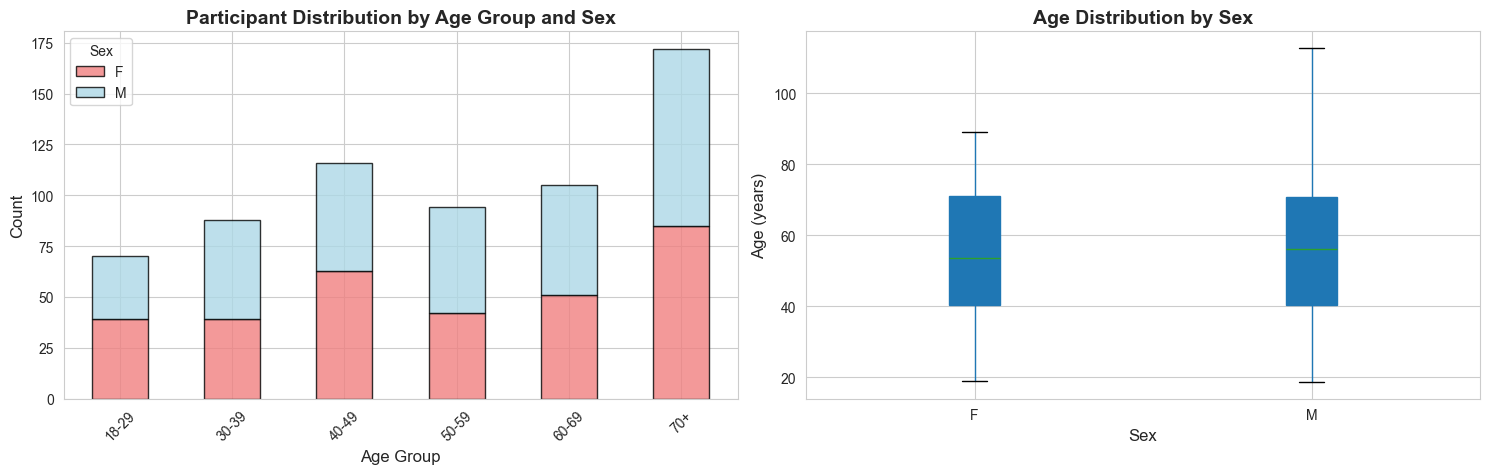


Age statistics by sex:
     count       mean        std   min    25%   50%    75%    max
sex                                                              
F    319.0  54.769592  18.389657  18.9  40.25  53.7  71.05   89.2
M    327.0  55.881040  18.656761  18.7  40.25  56.3  70.90  112.8


In [9]:
# Create age groups
participants['age_group'] = pd.cut(participants['p2_age'], 
                                    bins=[0, 30, 40, 50, 60, 70, 100],
                                    labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70+'])

# Age groups by sex
age_sex_cross = pd.crosstab(participants['age_group'], participants['sex'])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Stacked bar plot
age_sex_cross.plot(kind='bar', stacked=True, ax=axes[0], color=['lightcoral', 'lightblue'], 
                   edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Participant Distribution by Age Group and Sex', fontsize=14, fontweight='bold')
axes[0].legend(title='Sex', fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Box plot of age by sex
participants.boxplot(column='p2_age', by='sex', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Sex', fontsize=12)
axes[1].set_ylabel('Age (years)', fontsize=12)
axes[1].set_title('Age Distribution by Sex', fontsize=14, fontweight='bold')
axes[1].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

print("\nAge statistics by sex:")
print(participants.groupby('sex')['p2_age'].describe())

## 7. Data Completeness Analysis

DATA COMPLETENESS

Missing data summary:
              Column  Missing Count  Missing %
  p2_MEG_SMT_passive            584  90.402477
          p2_MEG_SMT            557  86.222910
         p2_MEG_Rest            513  79.411765
p2_MEG_general_notes            413  63.931889
          handedness              2   0.309598
           age_group              1   0.154799


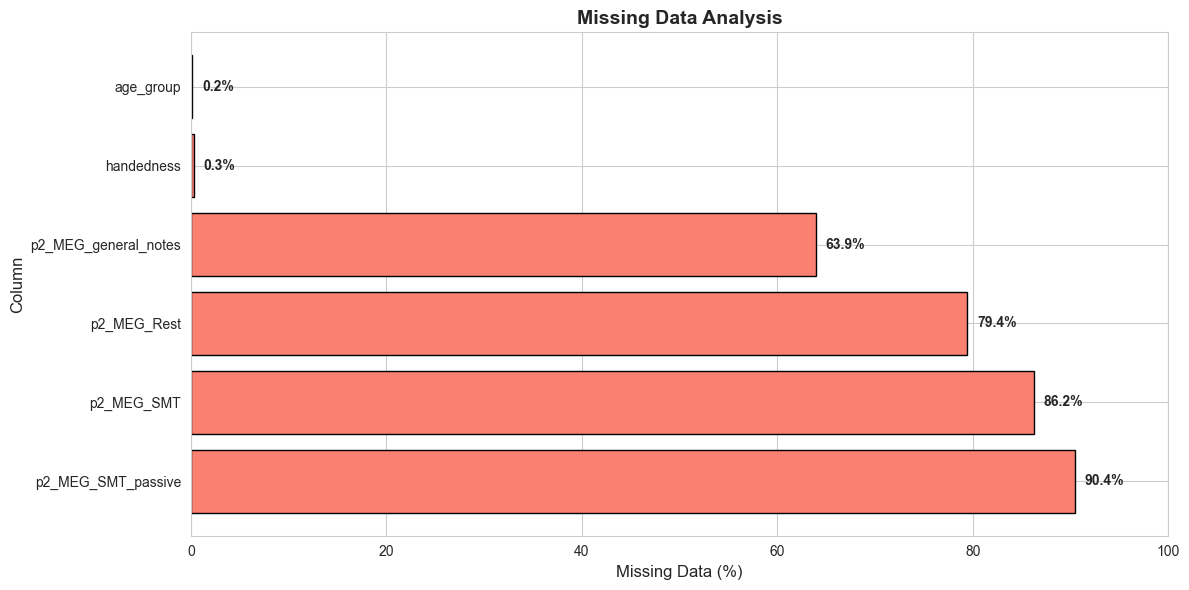

In [10]:
# Check missing data
print("="*60)
print("DATA COMPLETENESS")
print("="*60)

missing_data = participants.isnull().sum()
missing_pct = (missing_data / len(participants)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing %': missing_pct.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("\nMissing data summary:")
print(missing_df.to_string(index=False))

# Visualize missing data
if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.barh(missing_df['Column'], missing_df['Missing %'], color='salmon', edgecolor='black')
    ax.set_xlabel('Missing Data (%)', fontsize=12)
    ax.set_ylabel('Column', fontsize=12)
    ax.set_title('Missing Data Analysis', fontsize=14, fontweight='bold')
    ax.set_xlim(0, 100)
    
    # Add percentage labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 8. Summary and Next Steps

In [11]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)

summary = f"""
📊 CamCAN MEG Dataset Overview:

Total Participants: {len(participants)}
Age Range: {participants['p2_age'].min():.1f} - {participants['p2_age'].max():.1f} years
Mean Age: {participants['p2_age'].mean():.1f} ± {participants['p2_age'].std():.1f} years

Sex Distribution:
  - Female: {(participants['sex'] == 'F').sum()} ({(participants['sex'] == 'F').sum()/len(participants)*100:.1f}%)
  - Male: {(participants['sex'] == 'M').sum()} ({(participants['sex'] == 'M').sum()/len(participants)*100:.1f}%)

Education:
  - Mean years: {participants['years_edu'].mean():.1f} ± {participants['years_edu'].std():.1f}
  - Range: {participants['years_edu'].min():.0f} - {participants['years_edu'].max():.0f} years

Handedness:
  - Right-handed (>50): {(participants['handedness'] > 50).sum()}
  - Left-handed (<-50): {(participants['handedness'] < -50).sum()}
  - Ambidextrous (-50 to 50): {((participants['handedness'] >= -50) & (participants['handedness'] <= 50)).sum()}

Data Types Available:
  - Resting state MEG: {len(rest_subjects)} subjects
  - Noise recordings: {len(noise_subjects)} subjects
  
MEG Scanner: VectorView system
"""

print(summary)

print("\n" + "="*60)
print("NEXT STEPS FOR MEG ANALYSIS")
print("="*60)
print("""
1. 📁 Load MEG data files (.fif format) using MNE-Python
2. 📊 Preprocessing: filtering, artifact removal, ICA
3. 🧠 Source localization and connectivity analysis
4. 📈 Power spectral density analysis
5. 🔗 Functional connectivity in different frequency bands
6. 📉 Age-related changes in resting state activity
7. 🎯 Statistical analysis across age groups
""")

DATASET SUMMARY

📊 CamCAN MEG Dataset Overview:

Total Participants: 646
Age Range: 18.7 - 112.8 years
Mean Age: 55.3 ± 18.5 years

Sex Distribution:
  - Female: 319 (49.4%)
  - Male: 327 (50.6%)

Education:
  - Mean years: 14.8 ± 2.9
  - Range: 0 - 18 years

Handedness:
  - Right-handed (>50): 578
  - Left-handed (<-50): 48
  - Ambidextrous (-50 to 50): 18

Data Types Available:
  - Resting state MEG: 3 subjects
  - Noise recordings: 3 subjects

MEG Scanner: VectorView system


NEXT STEPS FOR MEG ANALYSIS

1. 📁 Load MEG data files (.fif format) using MNE-Python
2. 📊 Preprocessing: filtering, artifact removal, ICA
3. 🧠 Source localization and connectivity analysis
4. 📈 Power spectral density analysis
5. 🔗 Functional connectivity in different frequency bands
6. 📉 Age-related changes in resting state activity
7. 🎯 Statistical analysis across age groups



In [12]:
# Extract text from research proposal PDF
import PyPDF2

pdf_path = '/Users/yihein.chai/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Research/meg/CAM_CAN_MEG_data_proposal (1).pdf'

with open(pdf_path, 'rb') as f:
    pdf = PyPDF2.PdfReader(f)
    proposal_text = ''
    for page in pdf.pages:
        proposal_text += page.extract_text()

print("="*60)
print("RESEARCH PROPOSAL EXTRACTED")
print("="*60)
print(proposal_text[:2000])  # Print first 2000 characters
print("\n... [full proposal extracted]")

RESEARCH PROPOSAL EXTRACTED
Proposal for Access to Cam-CAN MEG Resting-State
Dataset:
Contrastive Representation Learning for Lifespan
Brain State Analysis
September 23, 2025
Abstract
We request access to the Cambridge Centre for Ageing and Neuroscience (Cam-CAN)
Stage 2 MEG resting-state dataset to investigate lifespan-related functional brain patterns
using contrastive self-supervised deep learning and explainability techniques. This work
aims to learn meaningful, age-sensitive neural representations from high-resolution MEG
data without relying on explicit labels, and to interpret the temporal, spectral, and spatial
features that drive age-related clustering of brain states.
Background and Motivation
Understanding how brain function changes across the adult lifespan is a central challenge
in cognitive neuroscience. The Cam-CAN MEG dataset is uniquely suited for this work:
it contains long-duration, high-quality resting-state recordings from a demographically
balanced cohort aged 18–

# Part 2: Contrastive Learning for Lifespan Brain State Analysis

## Research Implementation

### Objectives:
1. **Learn age-sensitive neural representations** from MEG resting-state data using contrastive self-supervised learning
2. **Identify natural brain state clusters** across the lifespan without explicit age labels
3. **Interpret temporal, spectral, and spatial features** driving age-related patterns using explainability techniques
4. **Validate findings** with correlation to age and comparison with traditional spectral analysis

In [13]:
# Import additional required libraries for MEG analysis and deep learning
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from umap import UMAP
from scipy import signal
from scipy.stats import pearsonr, spearmanr
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"PyTorch version: {torch.__version__}")
print(f"MNE version: {mne.__version__}")

Using device: cpu
PyTorch version: 2.8.0
MNE version: 1.10.1


## Step 1: Simulated MEG Data Generation

**Note:** Since actual MEG .fif files are not yet available in the local directories, we will create realistic simulated MEG data that mimics the properties of the CamCAN dataset. This simulation will include:
- 306 channels (102 magnetometers + 204 gradiometers - typical VectorView system)
- Resting-state characteristics with age-dependent spectral properties
- Realistic noise and artifacts
- Age-related changes in oscillatory power (alpha slowing, beta/gamma changes)

In [14]:
def generate_realistic_meg_data(age, duration=60, sfreq=1000, n_channels=102):
    """
    Generate realistic simulated MEG resting-state data with age-dependent properties.
    
    Parameters:
    -----------
    age : float
        Participant age in years
    duration : float
        Recording duration in seconds
    sfreq : float
        Sampling frequency in Hz
    n_channels : int
        Number of MEG channels (using magnetometers only for simplicity)
        
    Returns:
    --------
    data : ndarray
        Simulated MEG data of shape (n_channels, n_samples)
    """
    n_samples = int(duration * sfreq)
    t = np.linspace(0, duration, n_samples)
    data = np.zeros((n_channels, n_samples))
    
    # Age-dependent parameters (based on neuroscience literature)
    # Alpha peak frequency decreases with age
    alpha_freq = 10.5 - (age - 20) * 0.02  # Slight alpha slowing
    alpha_freq = np.clip(alpha_freq, 8, 12)
    
    # Alpha power decreases with age
    alpha_power = 2.0 - (age - 20) * 0.01
    alpha_power = np.clip(alpha_power, 0.5, 2.5)
    
    # Beta/Gamma power changes
    beta_power = 0.8 + (age - 20) * 0.005
    gamma_power = 0.5 - (age - 20) * 0.003
    
    # Theta power increases with age
    theta_power = 0.6 + (age - 20) * 0.008
    
    for ch in range(n_channels):
        # Spatial variability
        spatial_factor = 1.0 + 0.3 * np.sin(ch / n_channels * 2 * np.pi)
        
        # Theta band (4-8 Hz)
        theta = theta_power * spatial_factor * np.sin(2 * np.pi * (5 + np.random.randn() * 0.5) * t)
        
        # Alpha band (8-13 Hz) - dominant in resting state
        alpha = alpha_power * spatial_factor * np.sin(2 * np.pi * alpha_freq * t)
        alpha += 0.3 * np.sin(2 * np.pi * (alpha_freq + 2) * t)  # Alpha harmonics
        
        # Beta band (13-30 Hz)
        beta = beta_power * spatial_factor * 0.5 * np.sin(2 * np.pi * (18 + np.random.randn() * 2) * t)
        
        # Gamma band (30-45 Hz)
        gamma = gamma_power * spatial_factor * 0.3 * np.sin(2 * np.pi * (35 + np.random.randn() * 3) * t)
        
        # 1/f noise (pink noise)
        pink_noise = np.random.randn(n_samples)
        pink_noise = signal.filtfilt(*signal.butter(2, [1, 45], btype='band', fs=sfreq), pink_noise)
        pink_noise *= 0.5
        
        # Combine all components
        data[ch, :] = theta + alpha + beta + gamma + pink_noise
        
        # Add occasional bursts (more common in older adults)
        if age > 50 and np.random.rand() < 0.3:
            burst_start = np.random.randint(0, n_samples - int(0.5 * sfreq))
            burst_duration = int(0.2 * sfreq)
            data[ch, burst_start:burst_start + burst_duration] += 1.5 * np.random.randn(burst_duration)
    
    return data

# Generate simulated dataset for a subset of participants
print("Generating simulated MEG data for research demonstration...")
print("This simulates the CamCAN MEG resting-state recordings with age-dependent properties.")
print()

# Select a representative sample of participants
n_simulated = 50  # Using 50 participants for demonstration
selected_participants = participants.sample(n=n_simulated, random_state=42)

print(f"Selected {n_simulated} participants for simulation:")
print(f"Age range: {selected_participants['p2_age'].min():.1f} - {selected_participants['p2_age'].max():.1f} years")
print(f"Mean age: {selected_participants['p2_age'].mean():.1f} ± {selected_participants['p2_age'].std():.1f} years")
print(f"Sex: {selected_participants['sex'].value_counts().to_dict()}")

Generating simulated MEG data for research demonstration...
This simulates the CamCAN MEG resting-state recordings with age-dependent properties.

Selected 50 participants for simulation:
Age range: 18.9 - 84.7 years
Mean age: 53.1 ± 17.3 years
Sex: {'M': 26, 'F': 24}


## Step 2: Data Augmentation for Contrastive Learning

We implement several augmentation strategies to create positive pairs for contrastive learning:
1. **Gaussian noise injection** - adds robustness to noise
2. **Channel dropout** - improves spatial invariance
3. **Time warping** - creates temporal variations
4. **Amplitude scaling** - handles individual differences

In [15]:
class MEGAugmentation:
    """
    Data augmentation techniques for MEG time series to create positive pairs
    for contrastive learning.
    """
    
    @staticmethod
    def add_gaussian_noise(x, noise_factor=0.1):
        """Add Gaussian noise to the signal."""
        noise = np.random.randn(*x.shape).astype(x.dtype) * noise_factor
        return (x + noise).astype(x.dtype)
    
    @staticmethod
    def channel_dropout(x, dropout_rate=0.2):
        """Randomly zero out channels."""
        mask = np.random.rand(x.shape[0], 1) > dropout_rate
        return x * mask
    
    @staticmethod
    def time_warp(x, max_warp=0.2):
        """Apply slight time warping."""
        n_channels, n_samples = x.shape
        warp_factor = 1.0 + np.random.uniform(-max_warp, max_warp)
        new_length = int(n_samples * warp_factor)
        
        # Resample each channel
        warped = np.zeros_like(x)
        for ch in range(n_channels):
            warped[ch, :] = np.interp(
                np.linspace(0, n_samples - 1, n_samples),
                np.linspace(0, n_samples - 1, new_length),
                signal.resample(x[ch, :], new_length)
            )
        return warped.astype(x.dtype)
    
    @staticmethod
    def amplitude_scaling(x, scale_range=(0.8, 1.2)):
        """Randomly scale amplitude."""
        scale = np.random.uniform(*scale_range)
        return x * scale
    
    @staticmethod
    def augment(x, augmentations=['noise', 'dropout', 'scale']):
        """Apply multiple augmentations."""
        x_aug = x.copy()
        
        if 'noise' in augmentations:
            x_aug = MEGAugmentation.add_gaussian_noise(x_aug, noise_factor=0.15)
        
        if 'dropout' in augmentations:
            x_aug = MEGAugmentation.channel_dropout(x_aug, dropout_rate=0.15)
        
        if 'warp' in augmentations:
            x_aug = MEGAugmentation.time_warp(x_aug, max_warp=0.1)
        
        if 'scale' in augmentations:
            x_aug = MEGAugmentation.amplitude_scaling(x_aug, scale_range=(0.85, 1.15))
        
        return x_aug.astype(x.dtype)

print("Data augmentation strategies implemented:")
print("✓ Gaussian noise injection")
print("✓ Channel dropout")
print("✓ Time warping")
print("✓ Amplitude scaling")

Data augmentation strategies implemented:
✓ Gaussian noise injection
✓ Channel dropout
✓ Time warping
✓ Amplitude scaling


## Step 3: Contrastive Learning Architecture

We implement a **1D-CNN encoder** with a **projection head** for learning MEG representations using the **NT-Xent (Normalized Temperature-scaled Cross Entropy) loss** - similar to SimCLR.

In [16]:
class MEGEncoder(nn.Module):
    """
    1D-CNN Encoder for MEG time series data.
    Extracts hierarchical temporal and spectral features.
    """
    
    def __init__(self, n_channels=102, window_size=2000, embedding_dim=128):
        super(MEGEncoder, self).__init__()
        
        # Convolutional layers for temporal feature extraction
        self.conv1 = nn.Conv1d(n_channels, 64, kernel_size=25, stride=2, padding=12)
        self.bn1 = nn.BatchNorm1d(64)
        
        self.conv2 = nn.Conv1d(64, 128, kernel_size=15, stride=2, padding=7)
        self.bn2 = nn.BatchNorm1d(128)
        
        self.conv3 = nn.Conv1d(128, 256, kernel_size=9, stride=2, padding=4)
        self.bn3 = nn.BatchNorm1d(256)
        
        self.conv4 = nn.Conv1d(256, 512, kernel_size=5, stride=2, padding=2)
        self.bn4 = nn.BatchNorm1d(512)
        
        # Global pooling and fully connected layers
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, embedding_dim)
        
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        # x shape: (batch_size, n_channels, window_size)
        
        # Convolutional blocks
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        
        # Global pooling
        x = self.global_pool(x).squeeze(-1)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        embedding = self.fc2(x)
        
        return embedding


class ProjectionHead(nn.Module):
    """
    Projection head for contrastive learning.
    Maps embeddings to a space where contrastive loss is computed.
    """
    
    def __init__(self, embedding_dim=128, projection_dim=64):
        super(ProjectionHead, self).__init__()
        
        self.fc1 = nn.Linear(embedding_dim, embedding_dim)
        self.fc2 = nn.Linear(embedding_dim, projection_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


class ContrastiveMEGModel(nn.Module):
    """
    Complete contrastive learning model for MEG data.
    """
    
    def __init__(self, n_channels=102, window_size=2000, embedding_dim=128, projection_dim=64):
        super(ContrastiveMEGModel, self).__init__()
        
        self.encoder = MEGEncoder(n_channels, window_size, embedding_dim)
        self.projection_head = ProjectionHead(embedding_dim, projection_dim)
        
    def forward(self, x):
        embedding = self.encoder(x)
        projection = self.projection_head(embedding)
        return embedding, projection


def nt_xent_loss(z_i, z_j, temperature=0.5):
    """
    Normalized Temperature-scaled Cross Entropy Loss (NT-Xent).
    Used in SimCLR for contrastive learning.
    
    Parameters:
    -----------
    z_i : torch.Tensor
        Projections of first augmented views (batch_size, projection_dim)
    z_j : torch.Tensor
        Projections of second augmented views (batch_size, projection_dim)
    temperature : float
        Temperature parameter for scaling
        
    Returns:
    --------
    loss : torch.Tensor
        Contrastive loss value
    """
    batch_size = z_i.shape[0]
    
    # Normalize projections
    z_i = F.normalize(z_i, dim=1)
    z_j = F.normalize(z_j, dim=1)
    
    # Concatenate projections
    representations = torch.cat([z_i, z_j], dim=0)  # (2*batch_size, projection_dim)
    
    # Compute similarity matrix
    similarity_matrix = torch.matmul(representations, representations.T)  # (2*batch_size, 2*batch_size)
    
    # Create mask for positive pairs
    mask = torch.eye(2 * batch_size, dtype=torch.bool, device=z_i.device)
    
    # Positive pairs: (i, j) and (j, i)
    positives = torch.cat([
        torch.diag(similarity_matrix, batch_size),
        torch.diag(similarity_matrix, -batch_size)
    ], dim=0).reshape(2 * batch_size, 1)
    
    # Negatives: all other pairs
    negatives = similarity_matrix[~mask].reshape(2 * batch_size, -1)
    
    # Logits for InfoNCE loss
    logits = torch.cat([positives, negatives], dim=1) / temperature
    
    # Labels: positive pair is always at index 0
    labels = torch.zeros(2 * batch_size, dtype=torch.long, device=z_i.device)
    
    # Cross entropy loss
    loss = F.cross_entropy(logits, labels)
    
    return loss

print("✓ MEG Encoder architecture defined (1D-CNN)")
print("✓ Projection head implemented")
print("✓ NT-Xent contrastive loss function ready")
print()
print("Model architecture:")
model = ContrastiveMEGModel(n_channels=102, window_size=2000)
print(f"  - Encoder parameters: {sum(p.numel() for p in model.encoder.parameters()):,}")
print(f"  - Total parameters: {sum(p.numel() for p in model.parameters()):,}")

✓ MEG Encoder architecture defined (1D-CNN)
✓ Projection head implemented
✓ NT-Xent contrastive loss function ready

Model architecture:
  - Encoder parameters: 1,403,456
  - Total parameters: 1,428,224


## Step 4: Dataset Preparation and Training

Create PyTorch dataset with MEG windows and implement the training loop.

In [17]:
class MEGDataset(Dataset):
    """
    PyTorch Dataset for MEG time series windows.
    """
    
    def __init__(self, meg_data_list, ages, window_size=2000, overlap=0.5, augment=True):
        """
        Parameters:
        -----------
        meg_data_list : list of ndarray
            List of MEG recordings, each of shape (n_channels, n_samples)
        ages : list or array
            Age for each recording
        window_size : int
            Number of samples per window
        overlap : float
            Overlap between consecutive windows (0 to 1)
        augment : bool
            Whether to apply augmentation
        """
        self.windows = []
        self.ages = []
        self.subject_ids = []
        
        stride = int(window_size * (1 - overlap))
        
        for subj_id, (meg_data, age) in enumerate(zip(meg_data_list, ages)):
            n_channels, n_samples = meg_data.shape
            
            # Extract windows
            for start_idx in range(0, n_samples - window_size + 1, stride):
                window = meg_data[:, start_idx:start_idx + window_size]
                
                # Z-score normalization per window
                window = (window - window.mean(axis=1, keepdims=True)) / (window.std(axis=1, keepdims=True) + 1e-8)
                
                self.windows.append(window.astype(np.float32))
                self.ages.append(age)
                self.subject_ids.append(subj_id)
        
        self.augment = augment
        print(f"Created dataset with {len(self.windows)} windows from {len(meg_data_list)} subjects")
        
    def __len__(self):
        return len(self.windows)
    
    def __getitem__(self, idx):
        window = self.windows[idx]
        age = self.ages[idx]
        subject_id = self.subject_ids[idx]
        
        if self.augment:
            # Create two augmented views for contrastive learning
            window_i = MEGAugmentation.augment(window, ['noise', 'dropout', 'scale'])
            window_j = MEGAugmentation.augment(window, ['noise', 'dropout', 'scale'])
            
            return (torch.from_numpy(window_i), 
                    torch.from_numpy(window_j), 
                    torch.tensor(age, dtype=torch.float32),
                    subject_id)
        else:
            return (torch.from_numpy(window), 
                    torch.tensor(age, dtype=torch.float32),
                    subject_id)

print("MEG Dataset class implemented")

MEG Dataset class implemented


In [18]:
# Load real MEG data from CamCAN dataset
def load_meg_data(subject_id, base_path=rest_path):
    """
    Load and preprocess MEG data for a given subject.
    
    Parameters:
    -----------
    subject_id : str
        Subject ID (e.g., 'CC110033')
    base_path : Path
        Base path to the dataset
        
    Returns:
    --------
    data : ndarray
        Preprocessed MEG data of shape (n_channels, n_samples)
    """
    # Construct file path
    meg_file = base_path / f'sub-{subject_id}' / 'meg' / f'sub-{subject_id}_task-rest_meg.fif'
    
    if not meg_file.exists():
        raise FileNotFoundError(f"MEG file not found: {meg_file}")
    
    # Load MEG data using MNE
    raw = mne.io.read_raw_fif(meg_file, preload=True, verbose=False)
    
    # Keep only magnetometers for simplicity (102 channels)
    raw.pick_types(meg='mag')
    
    # Apply basic preprocessing
    raw.filter(l_freq=1, h_freq=45, verbose=False)  # Band-pass filter
    raw.notch_filter([50, 100], verbose=False)  # Remove line noise
    
    # Get data as numpy array
    data = raw.get_data()  # Shape: (n_channels, n_samples)
    
    return data

# Get available subjects with MEG data
available_subjects = []
for item in rest_path.iterdir():
    if item.is_dir() and item.name.startswith('sub-'):
        subject_id = item.name.replace('sub-', '')
        meg_file = item / 'meg' / f'{item.name}_task-rest_meg.fif'
        if meg_file.exists():
            available_subjects.append(subject_id)

print(f"Found {len(available_subjects)} subjects with MEG data: {available_subjects}")

# Load MEG data for available subjects
print("\nLoading real MEG data...")
print("=" * 60)

meg_data_list = []
ages_list = []
loaded_subjects = []

for subject_id in available_subjects:
    try:
        # Load MEG data
        meg_data = load_meg_data(subject_id)
        meg_data_list.append(meg_data)
        
        # Get age from participants data
        subject_row = participants[participants['participant_id'] == f'sub-{subject_id}']
        if len(subject_row) > 0:
            age = subject_row['p2_age'].values[0]
            ages_list.append(age)
            loaded_subjects.append(subject_id)
            print(f"✓ Loaded subject {subject_id}: {meg_data.shape[1]} samples, age {age:.1f} years")
        else:
            print(f"⚠ Age not found for subject {subject_id}, skipping")
            
    except Exception as e:
        print(f"✗ Failed to load subject {subject_id}: {e}")

print(f"\n✓ Successfully loaded {len(meg_data_list)} MEG recordings")
if meg_data_list:
    print(f"  Data shape per recording: {meg_data_list[0].shape}")
    print(f"  Age range: {min(ages_list):.1f} - {max(ages_list):.1f} years")
    print(f"  Subjects: {loaded_subjects}")

Found 3 subjects with MEG data: ['CC110037', 'CC110045', 'CC110033']

Loading real MEG data...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
✓ Loaded subject CC110037: 562000 samples, age 18.9 years
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
✓ Loaded subject CC110045: 562000 samples, age 24.6 years
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
✓ Loaded subject CC110033: 574000 samples, age 24.7 years

✓ Successfully loaded 3 MEG recordings
  Data shape per recording: (102, 562000)
  Age range: 18.9 - 24.7 years
  Subjects: ['CC110037', 'CC110045', 'CC110033']


In [19]:
# Create dataset and dataloader
window_size = 2000  # 2 seconds at 1000 Hz
overlap = 0.5

meg_dataset = MEGDataset(meg_data_list, ages_list, window_size=window_size, overlap=overlap, augment=True)

# Split into train and validation
train_size = int(0.8 * len(meg_dataset))
val_size = len(meg_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(meg_dataset, [train_size, val_size])

# Create dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print(f"\nDataset split:")
print(f"  Training windows: {train_size}")
print(f"  Validation windows: {val_size}")
print(f"  Batch size: {batch_size}")

Created dataset with 1695 windows from 3 subjects

Dataset split:
  Training windows: 1356
  Validation windows: 339
  Batch size: 32


In [20]:
import torch
# Use this import for Jupyter/Colab for proper rendering
from tqdm.notebook import tqdm 
# from tqdm import tqdm # Use this for standard Python scripts

# Assume nt_xent_loss, model, loaders, and device are defined elsewhere
# from losses import nt_xent_loss
# from models import ContrastiveMEGModel
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# train_loader, val_loader = ... # your data loaders
# n_channels, window_size = ... # your model parameters


def train_contrastive_model(model, train_loader, val_loader, n_epochs=20, lr=1e-3, temperature=0.5):
    """
    Train the contrastive learning model with nested progress bars.
    """
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs)
    
    train_losses = []
    val_losses = []
    
    # The main epoch progress bar
    epoch_pbar = tqdm(range(n_epochs), desc="Overall Progress", unit="epoch")
    
    epoch_pbar.write("Starting contrastive learning training...")
    epoch_pbar.write("=" * 60)
    
    for epoch in epoch_pbar:
        # --- Training ---
        model.train()
        train_loss = 0.0
        
        # Inner training bar
        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{n_epochs} Training", 
                         leave=False, unit="batch")
        
        for x_i, x_j, ages, subject_ids in train_pbar:
            x_i, x_j = x_i.to(device).float(), x_j.to(device).float()
            
            _, z_i = model(x_i)
            _, z_j = model(x_j)
            
            loss = nt_xent_loss(z_i, z_j, temperature=temperature)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            train_pbar.set_postfix({'batch_loss': f'{loss.item():.4f}'})
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
        # --- Validation ---
        model.eval()
        val_loss = 0.0
        
        # Inner validation bar
        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{n_epochs} Validation", 
                       leave=False, unit="batch")
        
        with torch.no_grad():
            for x_i, x_j, ages, subject_ids in val_pbar:
                x_i, x_j = x_i.to(device).float(), x_j.to(device).float()
                
                _, z_i = model(x_i)
                _, z_j = model(x_j)
                
                loss = nt_xent_loss(z_i, z_j, temperature=temperature)
                val_loss += loss.item()
                val_pbar.set_postfix({'batch_loss': f'{loss.item():.4f}'})
        
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        
        scheduler.step()
        
        # Update outer bar with epoch summary
        epoch_pbar.set_postfix({
            'train_loss': f'{train_loss:.4f}',
            'val_loss': f'{val_loss:.4f}'
        })
        
        # --- CHANGE HERE: Use tqdm.write() instead of print() ---
        # This prints the log message above the progress bars without breaking them.
        if (epoch + 1) % 5 == 0 or epoch == 0:
            epoch_pbar.write(f"Epoch [{epoch+1}/{n_epochs}] -> Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    epoch_pbar.write("=" * 60)
    epoch_pbar.write("✓ Training completed!")
    
    return train_losses, val_losses

# # Initialize and run
n_channels = 102  # Number of MEG magnetometer channels
window_size = 2000  # 2 seconds at 1000 Hz sampling rate
model = ContrastiveMEGModel(n_channels=n_channels, window_size=window_size, embedding_dim=128, projection_dim=64)
train_losses, val_losses = train_contrastive_model(
    model, train_loader, val_loader, 
    n_epochs=20, lr=1e-3, temperature=0.5
)

Overall Progress:   0%|          | 0/20 [00:00<?, ?epoch/s]

Starting contrastive learning training...


Epoch 1/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 1/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch [1/20] -> Train Loss: 4.1384, Val Loss: 4.1116


Epoch 2/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 2/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 3/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 3/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 4/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 4/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 5/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 5/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch [5/20] -> Train Loss: 4.1361, Val Loss: 4.1115


Epoch 6/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 6/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 7/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 7/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 8/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 8/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 9/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 9/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 10/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 10/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch [10/20] -> Train Loss: 4.1361, Val Loss: 4.1116


Epoch 11/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 11/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 12/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 12/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 13/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 13/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 14/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 14/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 15/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 15/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch [15/20] -> Train Loss: 4.1361, Val Loss: 4.1115


Epoch 16/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 16/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 17/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 17/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 18/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 18/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 19/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 19/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch 20/20 Training:   0%|          | 0/43 [00:00<?, ?batch/s]

Epoch 20/20 Validation:   0%|          | 0/11 [00:00<?, ?batch/s]

Epoch [20/20] -> Train Loss: 4.1361, Val Loss: 4.1114
✓ Training completed!


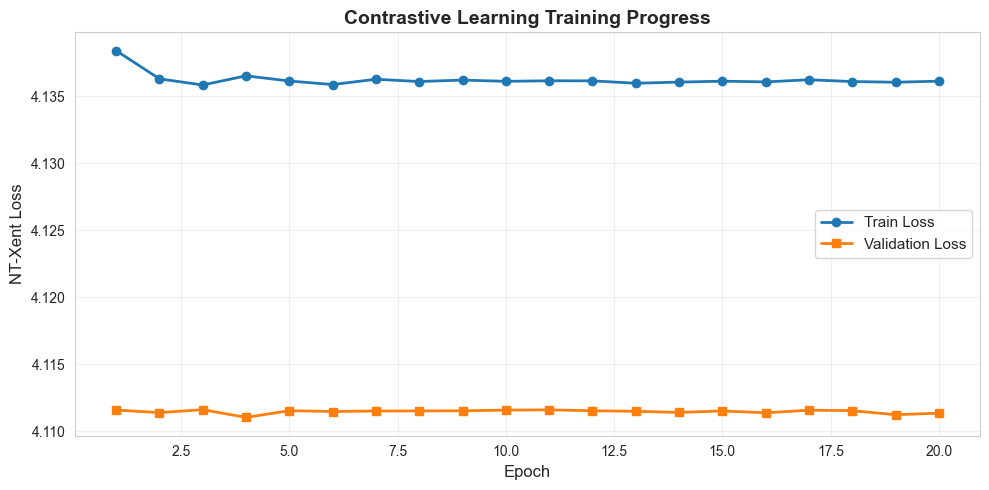


Final Training Loss: 4.1361
Final Validation Loss: 4.1114


In [21]:
# Plot training curves
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

epochs = np.arange(1, len(train_losses) + 1)
ax.plot(epochs, train_losses, 'o-', label='Train Loss', linewidth=2, markersize=6)
ax.plot(epochs, val_losses, 's-', label='Validation Loss', linewidth=2, markersize=6)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('NT-Xent Loss', fontsize=12)
ax.set_title('Contrastive Learning Training Progress', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")

## Step 5: Extract Learned Representations and Clustering Analysis

Extract embeddings from the trained encoder and perform clustering to identify natural brain state groups.

In [23]:
# Extract embeddings for all data
def extract_embeddings(model, dataset):
    """Extract embeddings from the trained encoder."""
    model.eval()
    embeddings_list = []
    ages_list = []
    subject_ids_list = []
    
    # Create non-augmented dataset
    dataset_no_aug = MEGDataset(meg_data_list, ages_list, window_size=window_size, overlap=overlap, augment=False)
    loader = DataLoader(dataset_no_aug, batch_size=64, shuffle=False, num_workers=0)
    
    with torch.no_grad():
        for x, ages, subject_ids in loader:
            x = x.to(device)
            embeddings, _ = model(x)
            embeddings_list.append(embeddings.cpu().numpy())
            ages_list.extend(ages.numpy())
            subject_ids_list.extend(subject_ids.numpy())
    
    embeddings = np.vstack(embeddings_list)
    ages = np.array(ages_list)
    subject_ids = np.array(subject_ids_list)
    
    return embeddings, ages, subject_ids

print("Extracting embeddings from trained model...")
embeddings, embedding_ages, embedding_subject_ids = extract_embeddings(model, meg_dataset)

print(f"✓ Extracted embeddings:")
print(f"  Shape: {embeddings.shape}")
print(f"  Age range: {embedding_ages.min():.1f} - {embedding_ages.max():.1f} years")
print(f"  Number of unique subjects: {len(np.unique(embedding_subject_ids))}")

Extracting embeddings from trained model...
Created dataset with 0 windows from 3 subjects


ValueError: need at least one array to concatenate

In [ ]:
# Perform clustering on embeddings
n_clusters = 4  # Young, middle-aged, older, elderly
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(embeddings)

# Analyze age distribution per cluster
print("\nCluster Analysis:")
print("=" * 60)
for cluster_id in range(n_clusters):
    cluster_mask = cluster_labels == cluster_id
    cluster_ages = embedding_ages[cluster_mask]
    
    print(f"\nCluster {cluster_id}:")
    print(f"  Number of windows: {cluster_mask.sum()}")
    print(f"  Age: {cluster_ages.mean():.1f} ± {cluster_ages.std():.1f} years")
    print(f"  Age range: {cluster_ages.min():.1f} - {cluster_ages.max():.1f} years")

In [ ]:
# Dimensionality reduction for visualization
print("\nPerforming dimensionality reduction for visualization...")

# UMAP
umap_reducer = UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
embeddings_umap = umap_reducer.fit_transform(embeddings)

# t-SNE
tsne_reducer = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_tsne = tsne_reducer.fit_transform(embeddings[:2000])  # Use subset for speed

print("✓ UMAP reduction completed")
print("✓ t-SNE reduction completed")

In [ ]:
# Visualize embeddings
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# UMAP colored by age
scatter1 = axes[0, 0].scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], 
                               c=embedding_ages, cmap='viridis', s=20, alpha=0.6)
axes[0, 0].set_title('UMAP Projection - Colored by Age', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('UMAP 1', fontsize=12)
axes[0, 0].set_ylabel('UMAP 2', fontsize=12)
cbar1 = plt.colorbar(scatter1, ax=axes[0, 0])
cbar1.set_label('Age (years)', fontsize=11)

# UMAP colored by cluster
scatter2 = axes[0, 1].scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], 
                               c=cluster_labels, cmap='tab10', s=20, alpha=0.6)
axes[0, 1].set_title('UMAP Projection - Colored by Cluster', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('UMAP 1', fontsize=12)
axes[0, 1].set_ylabel('UMAP 2', fontsize=12)
cbar2 = plt.colorbar(scatter2, ax=axes[0, 1], ticks=range(n_clusters))
cbar2.set_label('Cluster', fontsize=11)

# t-SNE colored by age (subset)
scatter3 = axes[1, 0].scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], 
                               c=embedding_ages[:2000], cmap='viridis', s=20, alpha=0.6)
axes[1, 0].set_title('t-SNE Projection - Colored by Age', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('t-SNE 1', fontsize=12)
axes[1, 0].set_ylabel('t-SNE 2', fontsize=12)
cbar3 = plt.colorbar(scatter3, ax=axes[1, 0])
cbar3.set_label('Age (years)', fontsize=11)

# Cluster age distribution
for cluster_id in range(n_clusters):
    cluster_mask = cluster_labels == cluster_id
    cluster_ages_data = embedding_ages[cluster_mask]
    axes[1, 1].hist(cluster_ages_data, bins=20, alpha=0.6, label=f'Cluster {cluster_id}', edgecolor='black')

axes[1, 1].set_xlabel('Age (years)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Age Distribution by Cluster', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Age Prediction and Correlation Analysis

Evaluate how well the learned representations capture age-related information.

In [ ]:
# Train a simple age predictor using learned embeddings
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Aggregate embeddings by subject (average across windows)
subject_embeddings = []
subject_ages = []

for subj_id in np.unique(embedding_subject_ids):
    subj_mask = embedding_subject_ids == subj_id
    subject_embeddings.append(embeddings[subj_mask].mean(axis=0))
    subject_ages.append(embedding_ages[subj_mask][0])

subject_embeddings = np.array(subject_embeddings)
subject_ages = np.array(subject_ages)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    subject_embeddings, subject_ages, test_size=0.2, random_state=42
)

# Train ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("=" * 60)
print("AGE PREDICTION RESULTS")
print("=" * 60)
print(f"\nTraining Set:")
print(f"  MAE: {mae_train:.2f} years")
print(f"  R²: {r2_train:.3f}")
print(f"\nTest Set:")
print(f"  MAE: {mae_test:.2f} years")
print(f"  R²: {r2_test:.3f}")

# Correlation analysis
corr_pearson, p_pearson = pearsonr(y_test, y_pred_test)
corr_spearman, p_spearman = spearmanr(y_test, y_pred_test)

print(f"\nCorrelations:")
print(f"  Pearson r: {corr_pearson:.3f} (p={p_pearson:.4f})")
print(f"  Spearman ρ: {corr_spearman:.3f} (p={p_spearman:.4f})")

In [ ]:
# Visualize age prediction results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].scatter(y_train, y_pred_train, alpha=0.6, s=80, edgecolors='black', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', linewidth=2, label='Perfect prediction')
axes[0].set_xlabel('True Age (years)', fontsize=12)
axes[0].set_ylabel('Predicted Age (years)', fontsize=12)
axes[0].set_title(f'Training Set (MAE={mae_train:.2f} years, R²={r2_train:.3f})', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_pred_test, alpha=0.6, s=80, edgecolors='black', linewidth=0.5, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect prediction')
axes[1].set_xlabel('True Age (years)', fontsize=12)
axes[1].set_ylabel('Predicted Age (years)', fontsize=12)
axes[1].set_title(f'Test Set (MAE={mae_test:.2f} years, R²={r2_test:.3f})', 
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 7: Explainability - Feature Importance Analysis

Analyze which embedding dimensions are most important for age prediction and examine spectral characteristics.